In [46]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt

## Data cleaning podstawy

Zaczynamy od zaimportowania danych. Pomijamy pierwsze 20 i ostatnie 2 wiersze - nie są to dane, lecz tylko jakiś nieprzydatny nam do niczego tekst. Można teraz spojrzeć po raz pierwszy na nasz zbiór danych:

In [110]:
#ładowanie danych chwile może zająć, dlatego lepiej mieć w osobnej komórce
df = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)

In [111]:
df.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [40]:
# Nie widzimy wszystkich kolumn, ale można się domyśleć że są to poszczególne lata. Żeby się upewnić można spojrzeć 
# tylko na nazwy kolumn:
df.columns
# Faktycznie są to kolejne lata

Index([    'Type', 'Coverage',   'OdName',     'AREA', 'AreaName',      'REG',
        'RegName',      'DEV',  'DevName',       1980,       1981,       1982,
             1983,       1984,       1985,       1986,       1987,       1988,
             1989,       1990,       1991,       1992,       1993,       1994,
             1995,       1996,       1997,       1998,       1999,       2000,
             2001,       2002,       2003,       2004,       2005,       2006,
             2007,       2008,       2009,       2010,       2011,       2012,
             2013],
      dtype='object')

Wiemy już mniej więcej jak wygląda nasz dataset. Dobrze teraz będzie pozbyć sie niepotrzebnych dla nas danych, zakładając oczywiście że wiemy co będziemy później potrzebować a co nie. Dzięki temu nie dość że dataset będzie mniejszy (mniej pamięci) to będzie prostszy do obróbki.

In [112]:
#axis = 1 po to żeby usunął kolumny, nie wiersze
#inplace=True po to żeby zadziałał na naszych danych (bez tego zwraca kopie)
df.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True) 
df.head()

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


Teraz możemy spostrzec, że np. OdName to tak naprawde nazwa krajów, AreaName to nazwy kontynentów, a RegName to region danego kontynentu. Nie jest to tak czytelne jak mogłoby być, dlatego też to poprawimy (nadal będzie to po angielsku jednak). Dodamy też odrazu kolumne podsumowującą imigrację z dangeo kraju na przestrzeni lat, i nazwiemu ją 'Total'.

In [113]:
# zmiana nazw
df.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)

#dodanie sumy na przestrzeni lat
df['Total'] = df.sum(axis = 1)

df.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


In [115]:
# sprawdzanie czy gdzieś nam nie brakuje danych (bez sumy zwróci tabelke, mało czytelne, a nawet wcale)
df.isnull().sum()

Country      0
Continent    0
Region       0
DevName      0
1980         0
1981         0
1982         0
1983         0
1984         0
1985         0
1986         0
1987         0
1988         0
1989         0
1990         0
1991         0
1992         0
1993         0
1994         0
1995         0
1996         0
1997         0
1998         0
1999         0
2000         0
2001         0
2002         0
2003         0
2004         0
2005         0
2006         0
2007         0
2008         0
2009         0
2010         0
2011         0
2012         0
2013         0
Total        0
dtype: int64

Teraz coś bardziej dla wygody: zamienimy indexy wierszy z numerków na nazwy państw. Dzięki temu nie będzie trzeba pamiętać jakie państwo ma jaki index, tylko po prostu będzie można wyszukiwać po nazwie państwa, co znacząco ułatwi prace.

In [117]:
#jeżeli to się spróbiuje uruchomić dwukrotnie to sie będzie pluć - bo już nie będzie takiej kolumny jak 'Countries'
df = df.set_index('Country')
df.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


Na ten moment starczy, mamy już przyjemny do pracy dataset. Jeżeli podczas naszej pracy zauważymy, że potrzebujemy coś jeszcze zmienić/dodać do naszego datasetu, wtedy powinniśmy to zrobić. Możemy już przejść do rysowania wyrkesów, ażeby faktycznie poznać dane i do tego może nawet wyciągnąć z nich jakieś wnioski.

## Wykresy

Na początek prosty trik na ułatwienie sobie życia: ustawienie costumowego stylu dla wszystkich naszych wykresów. Oczywiście mozna to robić ręcznie, lecz takie uogólnienie znacznie przyspieszy i upiększy nam prace w tym akurat notebooku.

In [118]:
#sprawdźmy jakie są dostępne style:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [119]:
#nazwa fivethiryeight mnie zafrapowała, to sobie wybiorę ten
#ustawiamy styl dla wszystkich późniejszych wykresów przez samego matplotliba:
mpl.style.use(['fivethirtyeight'])

Mamy styl to już można też coś faktycznie spróbować zbadać. Np sprawdźmy trend imigracji z danego jakiegoś kraju na przestrzeni lat. Dla przykładu posłużą nam Włochy ('Italy'). 

In [51]:
#zaczniemy od stworzenia listy ze wszystkimi latami z naszego dataframe'u, użyjemy do tego np.arange
years = np.arange(1980,2014,1)

#jak już mamy liste ze wszystkimi latami jakie chcemy znaleźć, możemy użyć funkcji df.loc
df.loc['Italy',years]

1980    1820
1981    2057
1982    1480
1983     820
1984     858
1985     667
1986     731
1987    1101
1988     885
1989    1068
1990     895
1991     711
1992     623
1993     663
1994     558
1995     508
1996     476
1997     491
1998     399
1999     410
2000     383
2001     410
2002     374
2003     321
2004     334
2005     344
2006     325
2007     320
2008     370
2009     429
2010     434
2011     374
2012     440
2013     545
Name: Italy, dtype: object

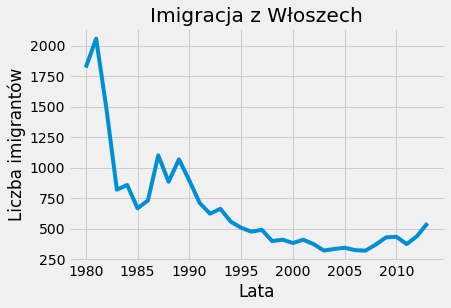

In [53]:
# znajduje, działa, super - możemy zadziałać dalej. Jako że python jest miły prosty i przyjemny, biblioteka
# matplotlib działa razem z pandasem - co mam przez to na myśli? taką magie (dla mnie to jest magiczne):
df.loc['Italy',years].plot()

#tutaj już musimy dodać pewne elementy: nie wszystko za nas rozwiąże automatyczny styl
plt.title('Imigracja z Włoszech')
plt.ylabel('Liczba imigrantów')
plt.xlabel('Lata')
plt.show()

Mamy wykres dla jednego kraju, co jak chcielibyśmy porównać wiecej niż jedno państwo? Nic prostszego, musimy jednak pamiętać aby dobrze sformatować dane:

In [72]:
mex_rwa_kor = df.loc[['Mexico', 'Rwanda', 'Republic of Korea'],years]
mex_rwa_kor

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Mexico,409,394,491,490,509,425,667,813,916,1017,...,2259,2837,2844,3239,2856,3092,3865,3947,4227,3996
Rwanda,6,6,8,4,3,0,9,3,12,11,...,299,378,360,420,358,415,396,492,562,415
Republic of Korea,1011,1456,1572,1081,847,962,1208,2338,2805,2979,...,5352,5832,6215,5920,7294,5874,5537,4588,5316,4509


In [73]:
# widzimy że dane te nie są w takiej formie jak wcześniejsze wyszukanie tylko jednego kraju - plot tutaj odrazu nie
# zadziała, należy najpierw dokonać transpozycji tego zbioru:
mex_rwa_kor.T

Country,Mexico,Rwanda,Republic of Korea
1980,409,6,1011
1981,394,6,1456
1982,491,8,1572
1983,490,4,1081
1984,509,3,847
1985,425,0,962
1986,667,9,1208
1987,813,3,2338
1988,916,12,2805
1989,1017,11,2979


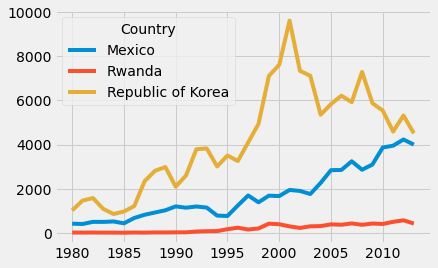

In [74]:
mex_rwa_kor.T.plot()

### Wykres kołowy (zazwyczaj useless, słowa zaufanej osoby)

Mieliśmy zwyczajny line plot (nic nie trzeba było specjalnie ustawiać bo taki jest domyślny typ .plot() ), a teraz zaszalejmy i zróbmy wykres kołowy (pie plot).

In [77]:
cont = df.groupby('Continent', axis=0).sum()
cont

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142
Oceania,1942,1839,1675,1018,878,920,904,1200,1181,1539,...,1585,1473,1693,1834,1860,1834,1548,1679,1775,55174


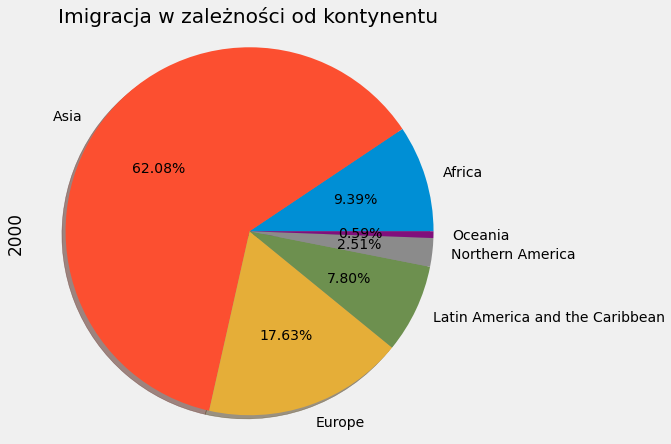

In [125]:
# i tutaj możemy sie pobawić, wybrać jaki rok nas interesuje, czy może nasz wcześniej przygotowany 'Total'
cont[2000].plot(kind='pie', figsize=(7,7),
                  autopct='%1.2f%%',
                  shadow=True)
plt.title('Imigracja w zależności od kontynentu')
plt.axis('equal')
plt.show()

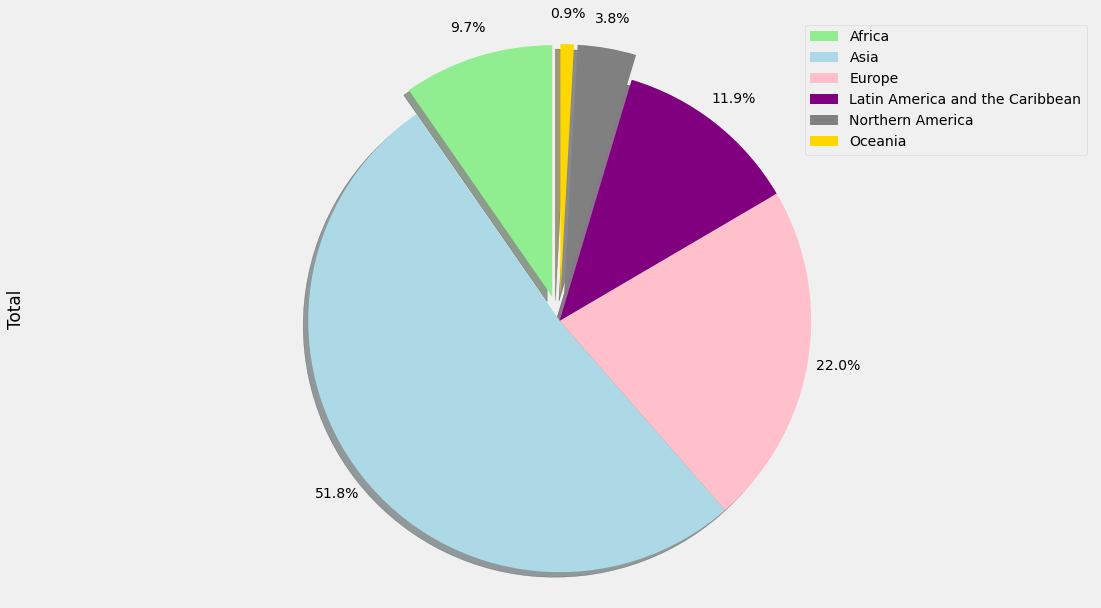

In [97]:
#no okej, pie plot nam powstał fajnie, ale jakby ktoś chciał żeby był jeszcze ładniejszy to można naprawde ciekawe 
#rzeczy stworzyć: kod tylko dla pokazania możliwości
colors = ['lightgreen', 'lightblue', 'pink', 'purple', 'grey', 'gold']
explode=[0.1, 0, 0, 0, 0.1, 0.1]
cont['Total'].plot(kind='pie', figsize=(17, 10),
                  autopct = '%1.1f%%', startangle=90,
                  shadow=True, labels=None, pctdistance=1.12, colors=colors, explode = explode)
plt.axis('equal')
plt.legend(labels=cont.index, loc='upper right', fontsize=14)
plt.show()

### Wykres pudełkowy

Teraz wykres bardzo dobrze pokazujący najważniejsze wartości statystyczne wszystko w jednym prawie: box plot (wykres pudełkowy) - jeżeli się z nim jeszcze nie spotkaliście to sie napewno spotkacie. Za przykład posłużą nam Indie.

In [129]:
#podaje jeden kraj, ale i tak dokonuje transpozycji, ponieważ przekazałem go jako array
india = df.loc[['India'], years].T

india

Country,India
1980,8880
1981,8670
1982,8147
1983,7338
1984,5704
1985,4211
1986,7150
1987,10189
1988,11522
1989,10343


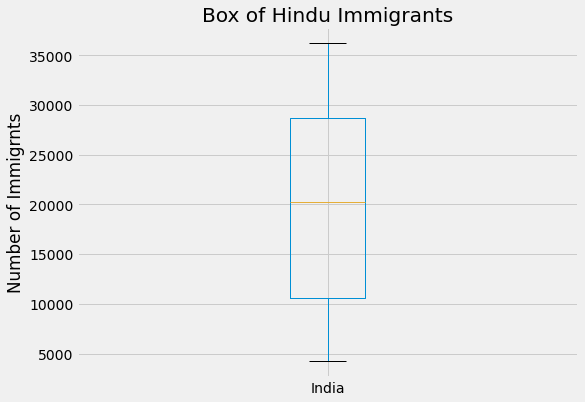

In [130]:
india.plot(kind='box', figsize=(8, 6))
plt.title('Box of Hindu Immigrants')
plt.ylabel('Number of Immigrnts')
plt.show()

Opis tego co możemy wyczytać z tego okresu:
- minimalną ilość imigrantów jaka wyemigrowała do Kanady (nie wiemy którego roku, ale znamy ich liczbe), jest to tzw 'dolny wąs'
- maksymalną liczbe imigrantów - górny wąs
- mediana - wartość środkowa naszego zbioru ilości imigrantów
- wartość pierwszego kwartyla (First Quartile) lub inaczej 25 percentyl - dolna ściana pudełka
- wartość trzeciego kwartyla (Third Quartile) lub inaczej 75 percentyl - górna ściana pudełka

I wszystko co potem można z tego wyliczyć wiadomo




Text(0, 0.5, 'Number of Immigrants')

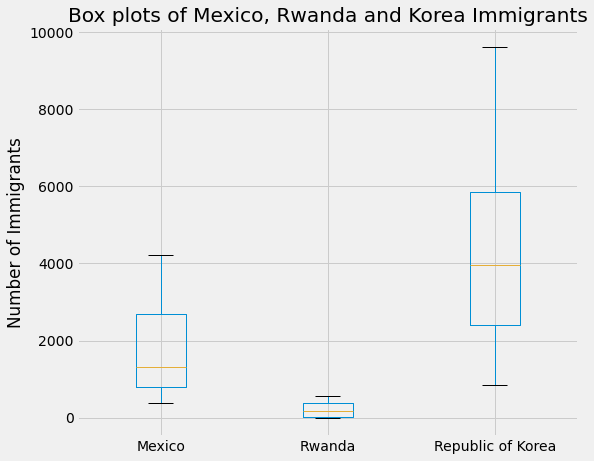

In [104]:
mex_rwa_kor.T.plot(kind='box', figsize=(8, 7))
plt.title('Box plots of Mexico, Rwanda and Korea Immigrants')
plt.ylabel('Number of Immigrants')

### Histogram

Na koniec tylko pokazanie przykładu histogramu, bardzo przydatny w analizie danych, tutaj na przykładzie danych imigracji wszystkich krajów w roku 2001:


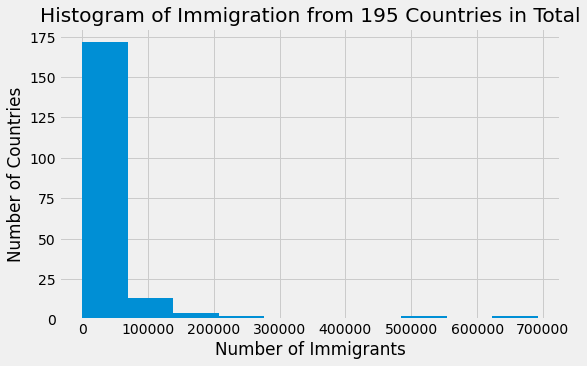

In [147]:
# data = df['Total'][df['Total'] < 200000]
# binwidth = 10000
# Bins =np.arange(min(data), max(data) + binwidth, binwidth)

df['Total'].plot(kind='hist', figsize=(8,5)) #, bins = Bins)
plt.title('Histogram of Immigration from 195 Countries in Total') 
plt.ylabel('Number of Countries') 
plt.xlabel('Number of Immigrants')
plt.show()

In [142]:
df['Total'] < 200000

Country
Afghanistan       True
Albania           True
Algeria           True
American Samoa    True
Andorra           True
                  ... 
Viet Nam          True
Western Sahara    True
Yemen             True
Zambia            True
Zimbabwe          True
Name: Total, Length: 195, dtype: bool